<a href="https://colab.research.google.com/github/eroolpal/detect_damagecause/blob/master/firefloodearthfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from fastai.vision import *

In [0]:
folder = 'fire'
file = 'urls_fire.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving housefire.csv to housefire.csv


In [0]:
!mv housefire.csv data/damage/urls_fire.csv


In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'flood'
file = 'urls_flood.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
from google.colab import files
uploaded = files.upload()

Saving houseflood.csv to houseflood.csv


In [0]:
!mv houseflood.csv data/damage/urls_flood.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'earthquake'
file = 'urls_earthquake.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [18]:
from google.colab import files
uploaded = files.upload()

Saving houseearthquake.csv to houseearthquake.csv


In [0]:
!mv houseearthquake.csv data/damage/urls_earthquake.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'fraud'
file = 'urls_fraud.csv'

In [0]:
path = Path('data/damage')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [24]:
from google.colab import files
uploaded = files.upload()

Saving housegood.csv to housegood.csv


In [0]:
!mv housegood.csv data/damage/urls_fraud.csv

In [0]:
classes = ['fire','flood','earthquake', 'fraud']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [30]:
data.classes

['earthquake', 'fire', 'flood', 'fraud']

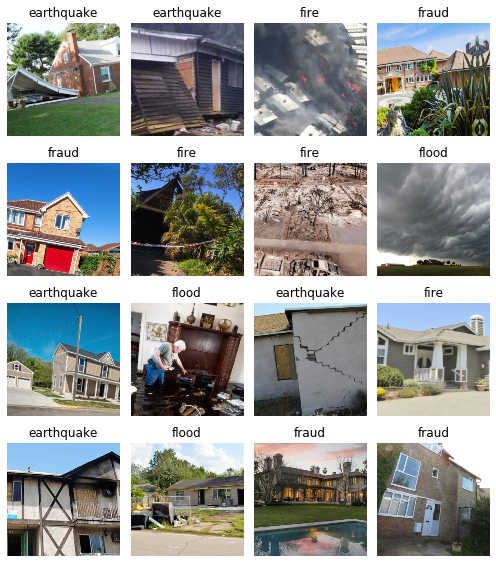

In [32]:
data.show_batch(rows=4, figsize=(7,8))

In [33]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['earthquake', 'fire', 'flood', 'fraud'], 4, 586, 146)

In [34]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 83.6MB/s]


In [35]:
#defaults.device= torch.device('gpu')
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.186996,1.470027,0.452055,00:12
1,1.762557,1.511461,0.417808,00:11
2,1.492537,1.520267,0.445205,00:11
3,1.348913,1.484766,0.438356,00:11


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


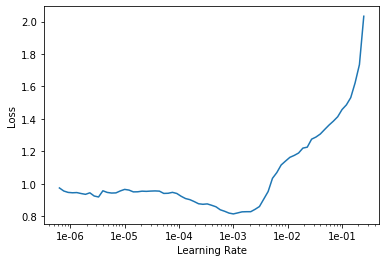

In [39]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.138972,1.270396,0.410959,00:12
1,0.939511,1.199920,0.383562,00:12


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

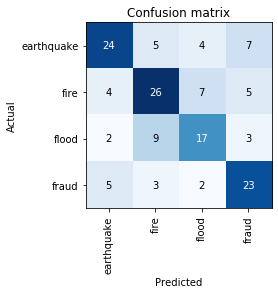

In [44]:

interp.plot_confusion_matrix()

Clean up the text

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

Putting your model in production

In [0]:

learn.export()

In [0]:

defaults.device = torch.device('cpu')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving china_earthquake.jpeg to china_earthquake.jpeg


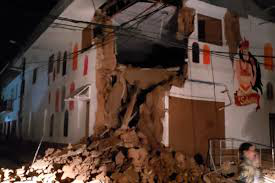

In [0]:
img = open_image('china_earthquake.jpeg')
img

In [0]:

learn = load_learner(path)

FileNotFoundError: ignored

In [0]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category earthquake